# (12주차) 5월23일

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-zvy1-0LofohSefcRP6bgkI

## imports

In [1]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## 모형의 성능을 올리기 위한 노력들 

### dropout 

`-` 아래의 예제를 복습하자. 

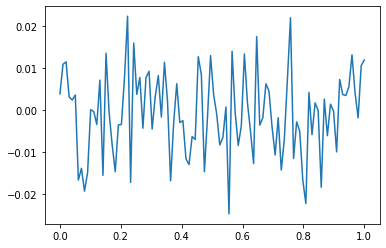

In [4]:
np.random.seed(43052)
x = np.linspace(0,1,100).reshape(100,1)
y = np.random.normal(loc=0,scale=0.01,size=(100,1))
plt.plot(x,y)

In [5]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x,y,epochs=5000,verbose=0,batch_size=100)

2022-05-23 19:11:51.428613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


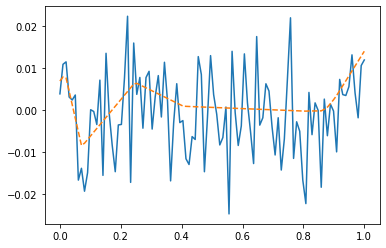

In [6]:
plt.plot(x,y)
plt.plot(x,net(x),'--')

`-` train/test로 나누어서 생각해보자.

In [7]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

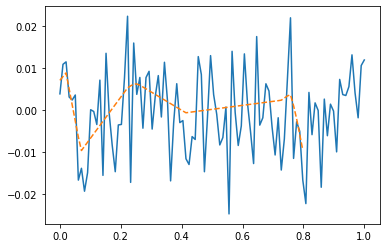

In [8]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')

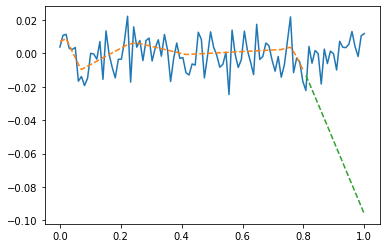

In [9]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

- train에서 추세를 따라가는게 좋은게 아니다 $\to$ 그냥 직선으로 핏하는거 이외에는 다 오버핏이다. 

`-` 매 에폭마다 적당히 80%의 노드들을 빼고 학습하자 $\to$ 너무 잘 학습되는 문제는 생기지 않을 것이다 (과적합이 방지될것이다?)

In [10]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dropout(0.8))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

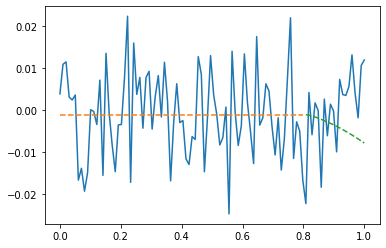

In [11]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

`-` 드랍아웃에 대한 summary
- 직관: 특정노드를 랜덤으로 off시키면 학습이 방해되어 오히려 과적합이 방지되는 효과가 있다 (그렇지만 진짜 중요한 특징이라면 랜덤으로 off 되더라도 어느정도는 학습될 듯)
- note: 드랍아웃을 쓰면 오버핏이 줄어드는건 맞지만 완전히 없어지는건 아니다. 
- note: 오버핏을 줄이는 유일한 방법이 드랍아웃만 있는것도 아니며, 드랍아웃이 오버핏을 줄이는 가장 효과적인 방법도 아니다 (최근에는 dropout보다 batch nomalization을 사용하는 추세임)

### train / val / test 

`-` data

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [13]:
X= x_train.reshape(-1,28,28,1)/255 ## 입력이 0~255 -> 0~1로 표준화 시키는 효과 + float으로 자료형이 바뀜 
y = tf.keras.utils.to_categorical(y_train)
XX = x_test.reshape(-1,28,28,1)/255
yy = tf.keras.utils.to_categorical(y_test)

In [14]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [15]:
#collapese 
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.7666 - val_loss: 0.4976 - val_accuracy: 0.8320
Epoch 2/200
240/240 [==============================] - 0s 912us/step - loss: 0.4703 - accuracy: 0.8400 - val_loss: 0.4822 - val_accuracy: 0.8320
Epoch 3/200
240/240 [==============================] - 0s 895us/step - loss: 0.4287 - accuracy: 0.8518 - val_loss: 0.4339 - val_accuracy: 0.8535
Epoch 4/200
240/240 [==============================] - 0s 891us/step - loss: 0.4061 - accuracy: 0.8592 - val_loss: 0.4077 - val_accuracy: 0.8568
Epoch 5/200
240/240 [==============================] - 0s 931us/step - loss: 0.3851 - accuracy: 0.8661 - val_loss: 0.3948 - val_accuracy: 0.8619
Epoch 6/200
240/240 [==============================] - 0s 893us/step - loss: 0.3703 - accuracy: 0.8699 - val_loss: 0.3900 - val_accuracy: 0.8617
Epoch 7/200
240/240 [==============================] - 0s 897us/step - loss: 0.3587 - accuracy: 0.8746 - val_loss: 0.3846 - val_accu

`-` 텐서보드 여는 방법1

In [16]:
%load_ext tensorboard
# 주피터노트북 (혹은 주피터랩)에서 텐서보드를 임베딩하여 넣을 수 있도록 도와주는 매직펑션

In [17]:
!rm -rf logs
!kill 313799

/bin/bash: line 0: kill: (313799) - No such process


In [18]:
# %tensorboard --logdir logs --host 0.0.0.0
# %tensorboard --logdir logs <-- 실습에서는 이렇게 하면됩니다. 

(참고사항) 파이썬 3.10의 경우 아래의 수정이 필요

`?/python3.10/site-packages/tensorboard/_vendor/html5lib/_trie/_base.py` 을 열고
```python
from collections import Mapping ### 수정전
from collections.abc import Mapping ### 수정후 
```
와 같이 수정한다. 

- 왜냐하면 파이썬 3.10부터 `from collections import Mapping` 가 동작하지 않고 `from collections.abc import Mapping` 가 동작하도록 문법이 바뀜

`-` 텐서보드를 실행하는 방법2

In [19]:
# !tensorboard --logdir logs --host 0.0.0.0
# !tensorboard --logdir logs <-- 실습에서는 이렇게 하면됩니다. 

### 조기종료 

`-` 텐서보드를 살펴보니 특정에폭 이후에는 오히려 과적합이 진행되는 듯 하다 (학습할수록 손해인듯 하다) $\to$ 그 특정에폭까지만 학습해보자

In [62]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [63]:
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 4ms/step - loss: 0.5477 - accuracy: 0.8128 - val_loss: 0.4201 - val_accuracy: 0.8455
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8674 - val_loss: 0.3643 - val_accuracy: 0.8708
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.8804 - val_loss: 0.3535 - val_accuracy: 0.8741
Epoch 4/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2950 - accuracy: 0.8888 - val_loss: 0.3439 - val_accuracy: 0.8809
Epoch 5/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.8971 - val_loss: 0.3333 - val_accuracy: 0.8780
Epoch 6/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.9020 - val_loss: 0.3128 - val_accuracy: 0.8841
Epoch 7/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9079 - val_loss: 0.3176 - val_accuracy: 0.8886

In [64]:
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.9086 - val_loss: 0.3320 - val_accuracy: 0.8823
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2247 - accuracy: 0.9147 - val_loss: 0.3220 - val_accuracy: 0.8877
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.9175 - val_loss: 0.3274 - val_accuracy: 0.8871


In [65]:
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2046 - accuracy: 0.9203 - val_loss: 0.3445 - val_accuracy: 0.8835
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1924 - accuracy: 0.9262 - val_loss: 0.3408 - val_accuracy: 0.8894
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1836 - accuracy: 0.9289 - val_loss: 0.3422 - val_accuracy: 0.8892


In [66]:
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1764 - accuracy: 0.9308 - val_loss: 0.3509 - val_accuracy: 0.8885
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9349 - val_loss: 0.3520 - val_accuracy: 0.8884


In [67]:
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1629 - accuracy: 0.9365 - val_loss: 0.3808 - val_accuracy: 0.8836
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.9389 - val_loss: 0.3586 - val_accuracy: 0.8882
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1509 - accuracy: 0.9413 - val_loss: 0.3596 - val_accuracy: 0.8917


`-` 몇 번 좀 참았다가 멈추면 좋겠다. 

In [68]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [69]:
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=5) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 4ms/step - loss: 0.5509 - accuracy: 0.8117 - val_loss: 0.4187 - val_accuracy: 0.8469
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8674 - val_loss: 0.3729 - val_accuracy: 0.8647
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.3221 - accuracy: 0.8794 - val_loss: 0.3499 - val_accuracy: 0.8710
Epoch 4/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8895 - val_loss: 0.3408 - val_accuracy: 0.8808
Epoch 5/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.8960 - val_loss: 0.3224 - val_accuracy: 0.8835
Epoch 6/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2605 - accuracy: 0.9014 - val_loss: 0.3181 - val_accuracy: 0.8851
Epoch 7/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2474 - accuracy: 0.9074 - val_loss: 0.3208 - val_accuracy: 0.8827

`-` 텐서보드로 그려보자?

In [71]:
#
# %tensorboard --logdir logs --host 0.0.0.0 
# 아무것도 안나온다 -> 왜? cb1을 써야 텐서보드가 나옴

`-` 조기종료와 텐서보드를 같이 쓰려면?

In [80]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu')) 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [81]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=7) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7184 - accuracy: 0.7581 - val_loss: 0.5077 - val_accuracy: 0.8276
Epoch 2/200
240/240 [==============================] - 0s 934us/step - loss: 0.4752 - accuracy: 0.8386 - val_loss: 0.4793 - val_accuracy: 0.8342
Epoch 3/200
240/240 [==============================] - 0s 913us/step - loss: 0.4304 - accuracy: 0.8517 - val_loss: 0.4386 - val_accuracy: 0.8497
Epoch 4/200
240/240 [==============================] - 0s 902us/step - loss: 0.4048 - accuracy: 0.8582 - val_loss: 0.4029 - val_accuracy: 0.8603
Epoch 5/200
240/240 [==============================] - 0s 925us/step - loss: 0.3832 - accuracy: 0.8669 - val_loss: 0.3932 - val_accuracy: 0.8619
Epoch 6/200
240/240 [==============================] - 0s 876us/step - loss: 0.3697 - accuracy: 0.8705 - val_loss: 0.3842 - val_accuracy: 0.8657
Epoch 7/200
240/240 [==============================] - 0s 903us/step - loss: 0.3569 - accuracy: 0.8759 - val_loss: 0.3844 - val_accu

In [84]:
# 
# 조기종료가 구현된 그림이 출력
# %tensorboard --logdir logs --host 0.0.0.0 

### 하이퍼파라메터 선택

`-` 하이퍼파라메터 설정

In [86]:
from tensorboard.plugins.hparams import api as hp

In [95]:
a=net.evaluate(XX,yy)

313/313 [==============================] - 0s 947us/step - loss: 0.4502 - accuracy: 0.8396


In [107]:
!rm -rf logs
for u in [50,5000]: 
    for d in [0.0,0.5]: 
        for o in ['adam','sgd']:
            logdir = 'logs/hpguebin_{}_{}_{}'.format(u,d,o)
            with tf.summary.create_file_writer(logdir).as_default():
                net = tf.keras.Sequential()
                net.add(tf.keras.layers.Flatten())
                net.add(tf.keras.layers.Dense(u,activation='relu'))
                net.add(tf.keras.layers.Dropout(d))
                net.add(tf.keras.layers.Dense(10,activation='softmax'))
                net.compile(optimizer=o,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
                cb3 = hp.KerasCallback(logdir, {'유닛수':u, '드랍아웃비율':d, '옵티마이저':o})
                net.fit(X,y,epochs=3,callbacks=cb3)
                _rslt=net.evaluate(XX,yy)
                _mymetric=_rslt[1]*0.8 + _rslt[2]*0.2  
                tf.summary.scalar('애큐러시와리컬의가중평균(테스트셋)', _mymetric, step=1) 

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5259 - accuracy: 0.8158 - recall: 0.7563
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3961 - accuracy: 0.8584 - recall: 0.8284
Epoch 3/3
313/313 [==============================] - 0s 849us/step - loss: 0.3879 - accuracy: 0.8572 - recall: 0.8315
Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7838 - accuracy: 0.7465 - recall: 0.5728
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5283 - accuracy: 0.8219 - recall: 0.7532
Epoch 3/3
313/313 [==============================] - 0s 838us/step - loss: 0.4980 - accuracy: 0.8269 - recall: 0.7800
Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7467 - accuracy: 0.7344 - recall: 0.6172
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5594 - accuracy: 0.8002 - recall: 0.7283
Epoch 3/3
313/313 [==============================] - 0s 

In [109]:
#
#%tensorboard --logdir logs --host 0.0.0.0

## 숙제

`-` 아래의 네트워크에서 옵티마이저를 adam, sgd를 선택하여 각각 적합시켜보고 testset의 loss를 성능비교를 하라. epoch은 5정도로 설정하라. 
```
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer=???,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
```